# Project analysis

In [1]:
import os
import sys
import pandas as pd
import numpy as np
from datetime import datetime, timedelta

%matplotlib inline
import matplotlib.pyplot as plt
import seaborn; seaborn.set()

nb_dir = os.path.split(os.getcwd())[0]
if nb_dir not in sys.path:
    sys.path.append(nb_dir)

import settings
from dataprocessor import load_repo_commits, load_project_commits
from project import get_project_output_dir_by_name, get_project_path

Set your project and repo config here

In [2]:
PROJECT_NAME = 'pydata-project'
pd.DataFrame.from_csv

<bound method DataFrame.from_csv of <class 'pandas.core.frame.DataFrame'>>

Load repo TSV file

In [3]:
df = load_project_commits(get_project_path(PROJECT_NAME))

Loading commits dataframe for scikit-learn
/home/skupsala/code/gitlytic/venv/lib/python3.5/site-packages/pandas/core/frame.py:1251: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  infer_datetime_format=infer_datetime_format)
Loading commits dataframe for ipython
Loading commits dataframe for scipy
Loading commits dataframe for matplotlib
Loading commits dataframe for tensorflow
Loading commits dataframe for notebook
Loading commits dataframe for pandas
Loading commits dataframe for numpy


In [4]:
df.set_index(['repo_name', 'author_email', 'commit_hash'], drop=False, inplace=True)
df.head()

commit_hash  \
repo_name    author_email                      commit_hash                                                                          
scikit-learn loic.esteve@ymail.com             7a2ce27a8f5a24db62998d444ed97470ad24319b  7a2ce27a8f5a24db62998d444ed97470ad24319b   
             ktisha@users.noreply.github.com   540ef6d418bb0d9ad509a6100df81c62d4a252e5  540ef6d418bb0d9ad509a6100df81c62d4a252e5   
             taylorkm@users.noreply.github.com a324a61eeace54947b9253de43e6f9f039e26185  a324a61eeace54947b9253de43e6f9f039e26185   
             loic.esteve@ymail.com             470c30050ee0a39e88496d7d4becc810881489c5  470c30050ee0a39e88496d7d4becc810881489c5   
             vrishank1997@gmail.com            8fa7771d139765002b78bc3853955c6ad06dde5d  8fa7771d139765002b78bc3853955c6ad06dde5d   

                                                                                               author_name  \
repo_name    author_email                      commit_hash                                                   
scikit-learn loic.esteve@ymail.com             7a2ce27a8f5a24db62998d444ed97470ad24319b        Loïc Estève   
             ktisha@users.noreply.github.com   540ef6d418bb0d9ad509a6100df81c62d4a252e5   Ekaterina Tuzova   
             taylorkm@users.noreply.github.com a324a61eeace54947b9253de43e6f9f039e26185         Kye Taylor   
             loic.esteve@ymail.com             470c30050ee0a39e88496d7d4becc810881489c5        Loïc Estève   
             vrishank1997@gmail.com            8fa7771d139765002b78bc3853955c6ad06dde5d  Vrishank Bhardwaj   

                                                                                                              author_email  \
repo_name    author_email                      commit_hash                                                                   
scikit-learn loic.esteve@ymail.com             7a2ce27a8f5a24db62998d444ed97470ad24319b              loic.esteve@ymail.com   
             ktisha@users.noreply.github.com   540ef6d418bb0d9ad509a6100df81c62d4a252e5    ktisha@users.noreply.github.com   
             taylorkm@users.noreply.github.com a324a61eeace54947b9253de43e6f9f039e26185  taylorkm@users.noreply.github.com   
             loic.esteve@ymail.com             470c30050ee0a39e88496d7d4becc810881489c5              loic.esteve@ymail.com   
             vrishank1997@gmail.com            8fa7771d139765002b78bc3853955c6ad06dde5d             vrishank1997@gmail.com   

                                                                                                author_date  \
repo_name    author_email                      commit_hash                                                    
scikit-learn loic.esteve@ymail.com             7a2ce27a8f5a24db62998d444ed97470ad24319b 2017-09-15 15:59:51   
             ktisha@users.noreply.github.com   540ef6d418bb0d9ad509a6100df81c62d4a252e5 2017-09-15 07:04:13   
             taylorkm@users.noreply.github.com a324a61eeace54947b9253de43e6f9f039e26185 2017-09-14 21:17:45   
             loic.esteve@ymail.com             470c30050ee0a39e88496d7d4becc810881489c5 2017-09-14 17:11:48   
             vrishank1997@gmail.com            8fa7771d139765002b78bc3853955c6ad06dde5d 2017-09-14 18:19:43   

                                                                                        committer_name  \
repo_name    author_email                      commit_hash                                               
scikit-learn loic.esteve@ymail.com             7a2ce27a8f5a24db62998d444ed97470ad24319b    Loïc Estève   
             ktisha@users.noreply.github.com   540ef6d418bb0d9ad509a6100df81c62d4a252e5   Joel Nothman   
             taylorkm@users.noreply.github.com a324a61eeace54947b9253de43e6f9f039e26185   Joel Nothman   
             loic.esteve@ymail.com             470c30050ee0a39e88496d7d4becc810881489c5    Loïc Estève   
             vrishank1997@gmail.com            8fa7771d139765002b78bc3853955c6ad06dde5d    Loïc Estève   

           

## Project overview
TODO
- TOP 10 contributors (3months, 2weeks)
  * How many commits
  * Percentage of commits
- Commmits per week chart over X weeks
- Commit message length distribution over all commits
- LOC over time
- Author count over time
- New authors per week for last X weeks
- Files over time
- Directories over time
- Fix commits over time

#### Commit and author count

In [5]:
total_commit_count = len(df)
print("Commit count: {}".format(total_commit_count))
total_author_count = df['author_email'].nunique()
print("Author count: {}".format(total_author_count))

Commit count: 150142
Author count: 5481


In [6]:
def get_top_contributors(df, top_count=10):
    commit_count = len(df)
    top_committers = df.groupby('author_email').size().sort_values(ascending=False)[:top_count].to_frame(name='commit_count')
    top_committers['percentage_of_commits'] = (top_committers['commit_count'] / commit_count) * 100.0
    return top_committers

In [7]:
repos_by_hour = {}
for repo_name, repo_df in df.groupby(level=0):
    print()
    print('-----------------------------------------------------------')
    print('Repo: {}'.format(repo_name))
    print('Commits: {}'.format(len(repo_df)))
    print('Authors: {}'.format(repo_df['author_email'].nunique()))
    oldest_commit = repo_df.iloc[-1]
    age_delta = datetime.now() - oldest_commit.author_date.to_pydatetime()
    age_delta_years = age_delta.days // 366 # This is not exact - precise enough for this purpose
    print('Age: {years} year(s) and {days} day(s)'.format(years=age_delta_years, days=(age_delta.days-age_delta_years*365)))
    print('First commit was written {} by {}'.format(oldest_commit.author_date.to_pydatetime(), oldest_commit.author_name))
    print('For nostalgy, here it is:')
    print(oldest_commit.subject)
    print()
    print('Since that a lot have happened...')
    TOP_COUNT = 5
    print('Here you see top {} contributors portion of the contributions'.format(TOP_COUNT))
    repo_top_contributors = get_top_contributors(repo_df, top_count=TOP_COUNT)
    print(repo_top_contributors.sum())
    print(repo_top_contributors)
    print()
    print('Last three months top {} contributors'.format(TOP_COUNT))
    last_three_months_commits = repo_df[repo_df['author_date'] >= (datetime.today() - timedelta(days=3 * 30))]
    last_three_months_top_contributors = get_top_contributors(last_three_months_commits, top_count=TOP_COUNT)
    print(last_three_months_top_contributors)
    print()
    print('Last two weeks top {} contributors'.format(TOP_COUNT))
    last_two_weeks_commits = repo_df[repo_df['author_date'] >= (datetime.today() - timedelta(days=14))]
    last_two_weeks_top_contributors = get_top_contributors(last_two_weeks_commits, top_count=TOP_COUNT)
    print(last_two_weeks_top_contributors)
    author_date_index = pd.DatetimeIndex(repo_df['author_date'])
    repos_by_hour[repo_name] = repo_df.groupby(author_date_index.hour)['author_email'].count()
    


-----------------------------------------------------------
Repo: ipython
Commits: 22829
Authors: 656
Age: 12 year(s) and 95 day(s)
First commit was written 2005-07-06 17:52:32 by fperez
For nostalgy, here it is:
Reorganized the directory for ipython/ to have its own dir, which is a bit more consistent with the SVN book recommended layout.

Since that a lot have happened...
Here you see top 5 contributors portion of the contributions
commit_count             14174.000000
percentage_of_commits       62.087695
dtype: float64
                              commit_count  percentage_of_commits
author_email                                                     
benjaminrk@gmail.com                  5562              24.363748
takowl@gmail.com                      2949              12.917780
bussonniermatthias@gmail.com          2431              10.648736
ellisonbg@gmail.com                   1762               7.718253
jdfreder@calpoly.edu                  1470               6.439178

Last th

Empty DataFrame
Columns: [commit_count, percentage_of_commits]
Index: []


/home/skupsala/code/gitlytic/venv/lib/python3.5/site-packages/ipykernel_launcher.py:3: FutureWarning: 'author_email' is both a column name and an index level.
Defaulting to column but this will raise an ambiguity error in a future version
  This is separate from the ipykernel package so we can avoid doing imports until


### Commits over time

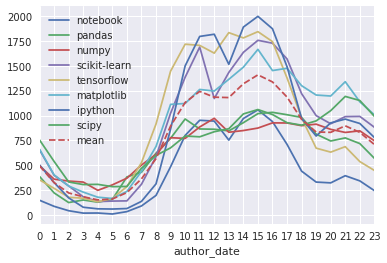

In [8]:
for repo_name, by_hour in repos_by_hour.items():
    ax = by_hour.plot(xticks=np.arange(24), label=repo_name)
    ax.legend()
mean_by_hour_df = pd.concat(list(repos_by_hour.values()), axis=1)
ax = mean_by_hour_df.mean(axis=1).plot(xticks=np.arange(24), label='mean', style='--')
ax.legend()

### Subject line distributions

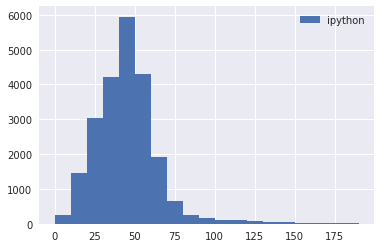

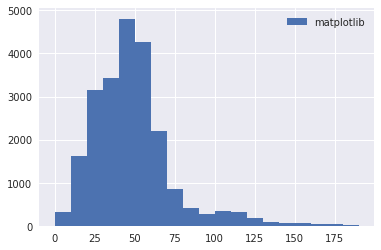

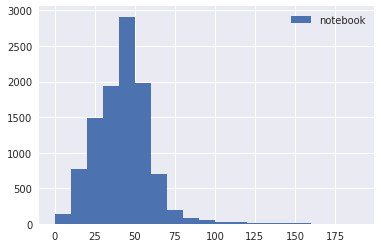

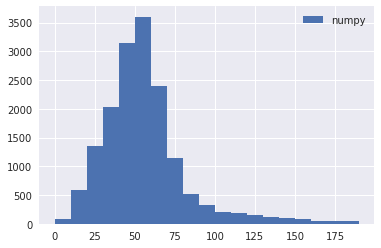

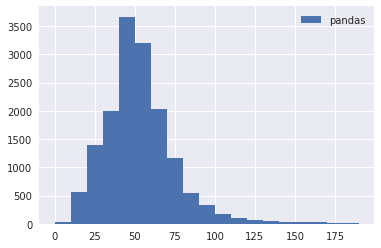

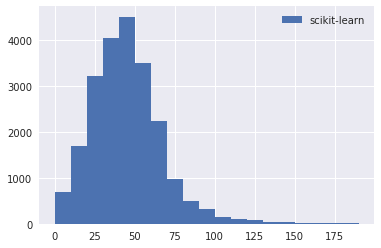

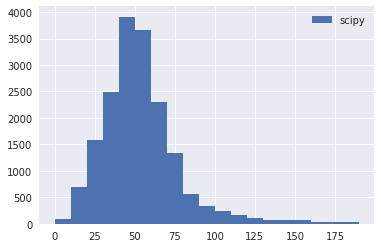

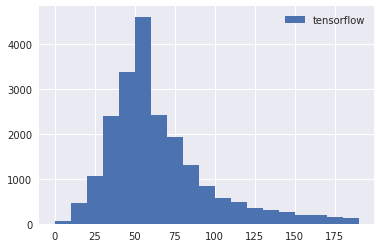

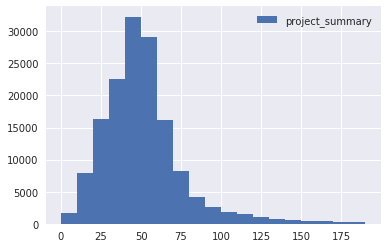

In [13]:
for repo_name, repo_df in df.groupby(level=0):
    plt.figure()
    s = pd.Series(repo_df['subject'].str.len().values)
    ax = s.dropna().hist(bins=[n for n in range(0, 200, 10)], label=repo_name)
    ax.legend()

plt.figure()
s = pd.Series(df['subject'].str.len().values)
ax = s.dropna().hist(bins=[n for n in range(0, 200, 10)], label='project_summary')
ax.legend()